In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


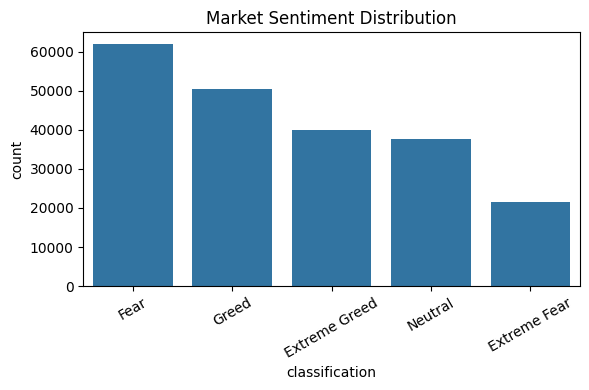

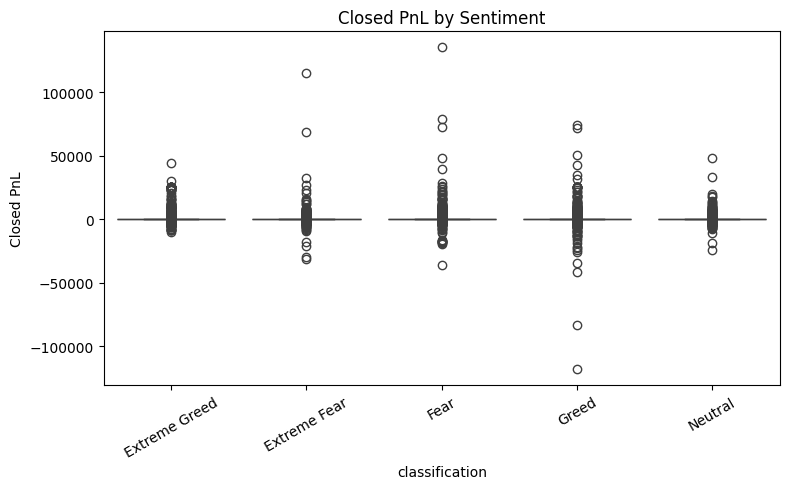

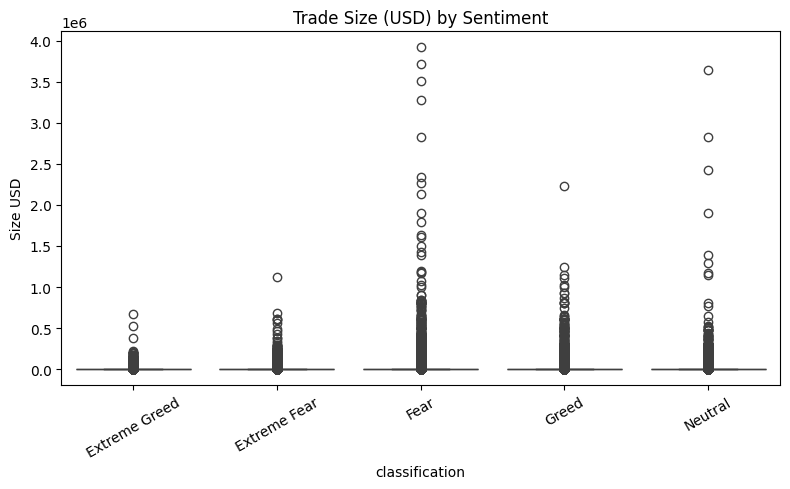

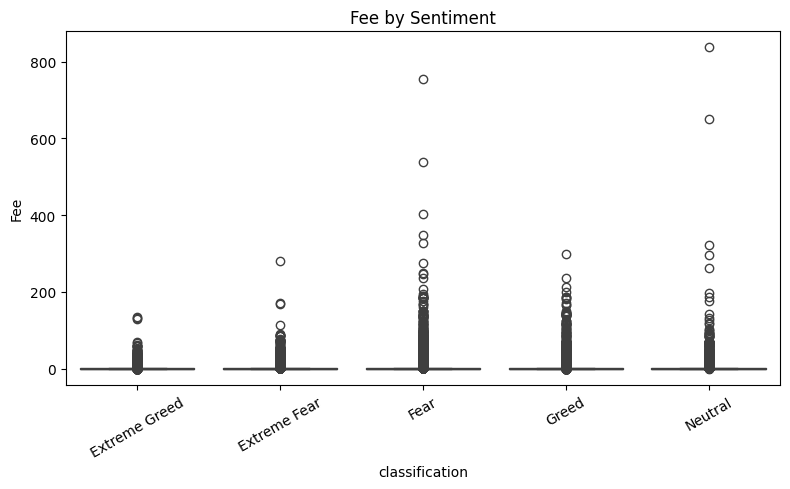

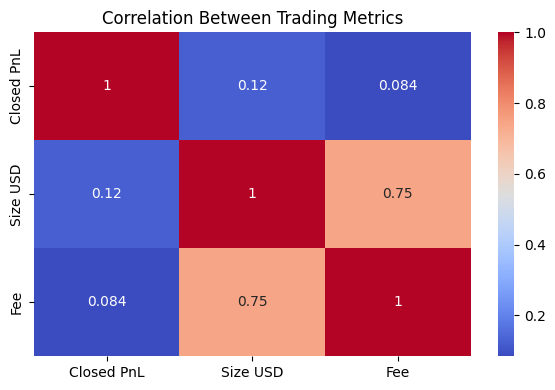

✅ All visualizations saved to: /content/drive/My Drive/ds_priyanka/outputs/


In [ ]:
import os
# STEP 2: Set file paths to your Google Drive folder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set paths
file_path = "/content/drive/My Drive/ds_priyanka/csv_files/merged_trader_sentiment.csv"
output_dir = "/content/drive/My Drive/ds_priyanka/outputs/"
os.makedirs(output_dir, exist_ok=True)

# STEP 3: Load dataset
df = pd.read_csv(file_path)

# Clean data
df.dropna(subset=['classification'], inplace=True)
df['Closed PnL'] = pd.to_numeric(df['Closed PnL'], errors='coerce')
df['Size USD'] = pd.to_numeric(df['Size USD'], errors='coerce')
df['Fee'] = pd.to_numeric(df['Fee'], errors='coerce')


# Sentiment Distribution

plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=df, order=df['classification'].value_counts().index)
plt.title("Market Sentiment Distribution")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(output_dir + "sentiment_distribution.png")
plt.show()

# Closed PnL by Sentiment

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=df)
plt.title("Closed PnL by Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(output_dir + "closedpnl_by_sentiment.png")
plt.show()


# Trade Size by Sentiment

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Size USD', data=df)
plt.title("Trade Size (USD) by Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(output_dir + "sizeusd_by_sentiment.png")
plt.show()


#  Fee Distribution by Sentiment

plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Fee', data=df)
plt.title("Fee by Sentiment")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig(output_dir + "fee_by_sentiment.png")
plt.show()


#  Correlation Heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df[['Closed PnL', 'Size USD', 'Fee']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Trading Metrics")
plt.tight_layout()
plt.savefig(output_dir + "correlation_heatmap.png")
plt.show()

print("✅ All visualizations saved to:", output_dir)

